In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

df = pd.read_csv('/content/IFND dataset.csv', encoding = 'unicode_escape', engine ='python')
df.head()

,id,Statement,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",1
2,4,LAC tensions: China's strategy behind delibera...,1
3,5,India has signed 250 documents on Space cooper...,1
4,6,Tamil Nadu chief minister's mother passes away...,1


In [ ]:

df=df.sample(frac=1).reset_index(drop=True)


In [ ]:
import seaborn as sns
df1=df.copy()
df1.reset_index(inplace=True)
df1.head(2)

,index,id,Statement,Label
0,0,46438,Video Exaggerates 9 Public Sector Banks Could ...,0
1,1,36016,BJP keeps MPs on toes ï¿½ from Article 370 mee...,1


In [ ]:

messages=df.copy()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Statement'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['video exagger public sector bank could collaps bad',
 'bjp keep mp toe articl meet diwali ayushman bharat beneficiari',
 'five dead injur plastic factori explos west bengal malda',
 'ansari aid gun encount',
 'delhi court pull riot accus repres lawyer mehmood pracha play fraud',
 'peac tranquil along lac deepli disturb impact india china tie jaishankar',
 'presid ram nath kovind visit akshaya patra kitchen vrindavan serv mid day meal children',
 'fact check viral video inconsider handl decompos bodi',
 'fact check sri lankan woman offer prayer sabarimala rs',
 'covid caseload mount lakh',
 'aap ident punjab need allianc amarind tell congress chief rahul',
 'book week',
 'congress find mahagathbandhan fix legaci staunch critic jayaprakash narayan',
 'baba ramdev biopic come attack social media',
 'covid itali start vaccin januari',
 'hospit hand bodi wrong famili staffer suspend',
 'golden templ donat ppe kit ventil',
 'sc ask trial court expedit hear case foreign tablighi jamaat memb

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [ ]:

X.shape


(56714, 5000)

In [ ]:
df.columns

Index(['id', 'Statement', 'Label'], dtype='object')

In [ ]:
y=df['Label']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
tfidf_v.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aadhaar',
 'aaditya',
 'aaditya thackeray',
 'aadmi',
 'aaj',
 'aaj tak',
 'aam',
 'aam aadmi',
 'aamir',
 'aamir khan',
 'aap',
 'aap govt',
 'aap leader',
 'aap mla',
 'aatmanirbhar',
 'aayog',
 'abduct',
 'abdullah',
 'abhijit',
 'abhinandan']

accuracy:   0.926
Confusion matrix, without normalization


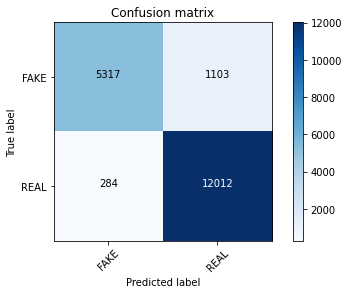

In [ ]:

# remove bag_of_words
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])



In [ ]:




#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=20)
random.fit(X_train, y_train.values.ravel())
rfc_pred = random.predict(X_test)

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, rfc_pred)*100,2)))
Random_Forest_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)

accuracy: 93.34%


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      6420
           1       0.94      0.96      0.95     12296

    accuracy                           0.93     18716
   macro avg       0.93      0.92      0.93     18716
weighted avg       0.93      0.93      0.93     18716



In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, rfc_pred)*100,2)))
Random_Forest_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)

accuracy: 93.34%


In [ ]:

#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 )

Accuracy :  93.34259457148963


In [ ]:
review = re.sub('[^a-zA-Z]', ' ', df['Statement'][130])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'maharashtra bjp oppos mva govt everi move sake sena mp raut'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
random.predict(val)

array([1])

In [ ]:
import pickle
pickle.dump(random, open('model2.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [ ]:
val_pkl = joblib_vect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([1])